In [19]:
print(__doc__)

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import itertools

import time 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM


%matplotlib inline 

Automatically created module for IPython interactive environment


In [23]:
#change if necessary to get different clusters
np.random.seed(123)

#downloaded from UCI Machine Repository
news_ica = pd.read_csv('./dr_outputs/News_ICA_output.csv')
news_ica = news_ica.drop(labels=['Unnamed: 0'], axis=1)
print news_ica.head()

#set variables 
data = news_ica
n_samples, n_features = data.shape
X = data
sample_size = 500

         X1        X2        X3        X4        X5        X6        X7  \
0 -1.513717  0.194626  0.005588 -0.128651  0.918635 -0.181623 -1.096567   
1 -1.505713  0.173345 -0.000571 -0.429493  0.906481 -0.388176  0.525462   
2 -1.559442  0.180484  0.046543 -0.314690  0.931874 -0.283023 -1.143536   
3 -1.515901  0.154323  0.020579  0.253908  0.911384 -0.059556 -0.557374   
4 -1.531935  0.305548  0.046099 -1.104151  0.902262 -0.161978  0.257773   

         X8        X9       X10       X11       X12       X13       X14  \
0 -0.618999 -0.113968  0.109884  0.165918  0.149484  0.499661  0.928186   
1 -0.181943 -0.112925 -0.042443  1.559835  0.163744  0.492657  0.922965   
2 -1.127884 -0.157158 -0.632114  0.237704  0.126899  0.750401  0.960105   
3 -0.314066 -0.133678  0.239732  0.011406  0.155134  0.623419  0.924784   
4 -1.137373 -0.074732 -0.608293 -1.320394  0.244677  0.650402  0.988177   

        X15       X16       X17       X18       X19       X20  
0 -1.180500  0.730325  0.038228 -0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1097bf350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116bd8e90>]], dtype=object)

/Users/paulinechow/Envs/ML-OMCS/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


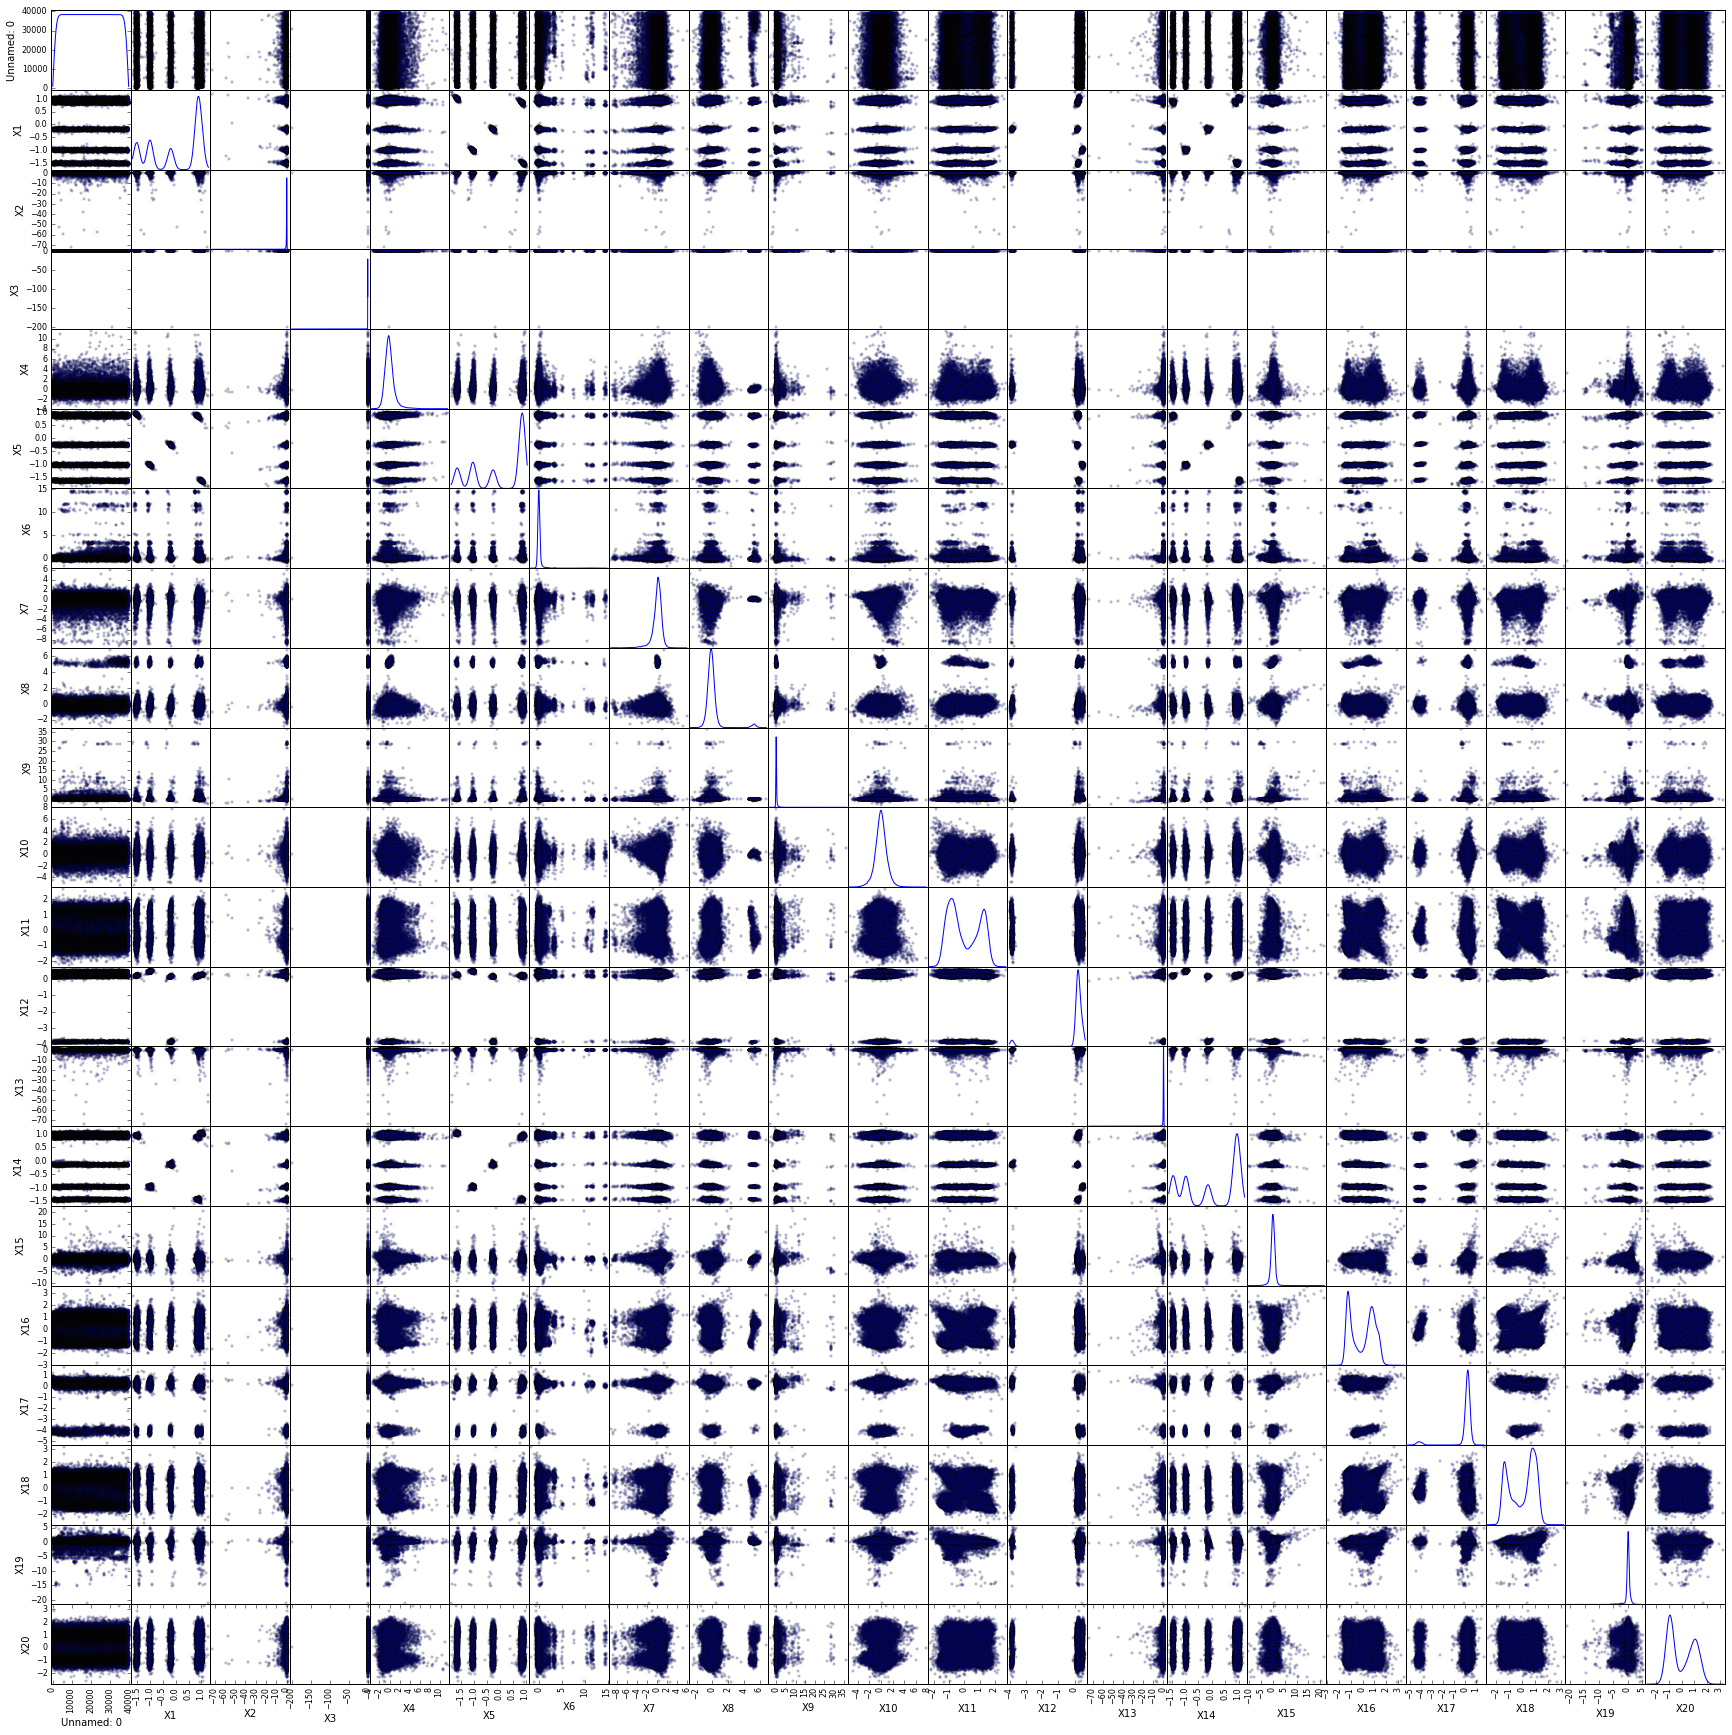

In [3]:
#Takes a long time to run -- not used in first part of the analysis
# pd.scatter_matrix(X, alpha=0.2, figsize=(30, 30), diagonal='kde')

In [24]:
##### FUNCTIONS TO EVALUTE THE PERFORMANCE OF CLUSTERING AND DIFFERENCE DISTANCES 
#################################################################################
def k_means_scikit(matrix, n):
    k_means = skcluster.KMeans(n_clusters=n, init='k-means++',
                               n_init=1, verbose=0)
    k_means.fit(matrix)

    return k_means.labels_

def evaluate_performance(data, labels, metric='euclidean'):
    score = silhouette_score(data, labels, metric=metric)
    print('Score:', score)

    return score

def cluster_and_evaluate_data(matrix, metric='euclidean'):
    print('Clustering started')
    clustering_start = time.time()
    labels = k_means_scikit(matrix)
    clustering_total = time.time() - clustering_start
    print('Clustering time:', clustering_total)

    evaluation_start = time.time()
    score = evaluate_performance(matrix, labels, metric)
    evaluation_total = time.time() - evaluation_start
    print('Evaluation time:', evaluation_total)
    total = time.time() - clustering_start
    print('Total time:', total)

In [33]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##### cluster data into K=1..10 clusters #####
#K, KM, centroids,D_k,cIdx,dist,avgWithinSS = kmeans.run_kmeans(X,10)

K = range(1,20)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K] # apply kmeans 1 to 10
centroids = [cent for (cent,var) in KM]   # cluster centroids

D_k_euclidean = [cdist(X, cent, 'euclidean') for cent in centroids] 
D_k_seuclidean  = [cdist(X, cent, 'seuclidean') for cent in centroids] 
D_k_jaccard  = [cdist(X, cent, 'jaccard') for cent in centroids] 

# PC --- unsure of changing the distances here, sum of squares best fits and converges with Euclidean unsure how 
# to prove convergence of other distance and application of sum of squares 

#other distances can be found here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist
#minkowski
#wminkowski -- weighted minkowski
#seuclidean -- standardized euclidean measure between two n-vectors
#sqeuclidean -- square euclidean
# cosin distance 
#correlation -- between vectors 
# print 'EUCLIDEAN ', D_k_euclidean
# print 'SEUCLIDEAN ', D_k_seuclidean
# print 'JACCARD ', D_k_seuclidean


In [34]:
#assign values based on distance measure above
cIdx_euclidean = [np.argmin(D,axis=1) for D in D_k_euclidean]
dist_euclidean = [np.min(D,axis=1) for D in D_k_euclidean]
avgWithinSS_euclidean = [sum(d)/X.shape[0] for d in dist_euclidean] 

cIdx_seuclidean = [np.argmin(D,axis=1) for D in D_k_seuclidean]
dist_seuclidean = [np.min(D,axis=1) for D in D_k_seuclidean]
avgWithinSS_seuclidean = [sum(d)/X.shape[0] for d in dist_seuclidean] 

cIdx_jaccard = [np.argmin(D,axis=1) for D in D_k_jaccard]
dist_jaccard = [np.min(D,axis=1) for D in D_k_jaccard]
avgWithinSS_jaccard = [sum(d)/X.shape[0] for d in dist_jaccard] 

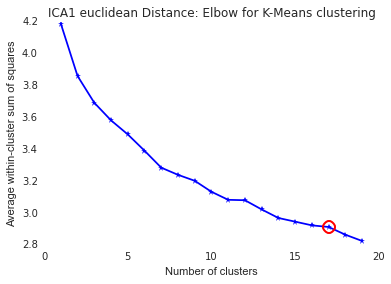

In [36]:
kIdx = 16
# plot elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS_euclidean, 'b*-')
ax.plot(K[kIdx], avgWithinSS_euclidean[kIdx], marker='o', markersize=12,          #plots a marker on the cluster
      markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('ICA1 euclidean Distance: Elbow for K-Means clustering')  

[13  3  3 ...,  1  4  1]
Counter({2: 5543, 13: 4816, 15: 4469, 1: 4149, 0: 3884, 12: 3181, 4: 2912, 10: 2811, 7: 2143, 5: 2064, 3: 1184, 9: 1167, 8: 1070, 6: 224, 14: 26, 11: 1})


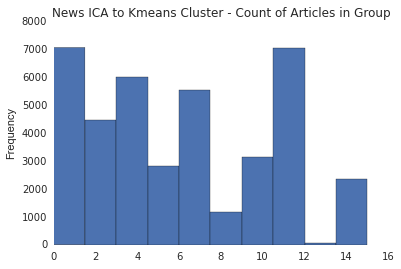

In [43]:
#input number being seen above
n_clusters = 16

##############################################################################
# Compute clustering with Means

k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

y= k_means_labels
print k_means_labels

#Output clusters to file for next part of analysis
X['ica_kmeans_k16'] = k_means_labels
X.to_csv('news_kmeans2_ica_k16.csv', index=False)
X.ica_kmeans_k5.plot(kind='hist')
tt = plt.title('News ICA to Kmeans Cluster - Count of Articles in Group')  

from collections import Counter
freqs = Counter(k_means_labels)
print freqs

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9', u'X10',
       u'X11', u'X12', u'X13', u'X14', u'X15', u'X16', u'X17', u'X18', u'X19',
       u'X20'],
      dtype='object')


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


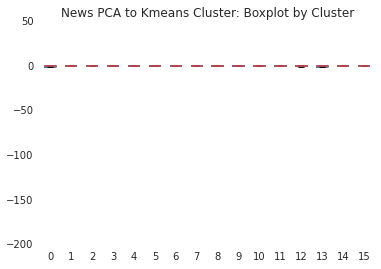

In [38]:
#Output results to csv for graphing and analysis in excel
grp_avg = X.groupby('ica_kmeans_k5').mean()
print grp_avg.columns
grp_avg.transpose().boxplot()
tt = plt.title('News PCA to Kmeans Cluster: Boxplot by Cluster')  

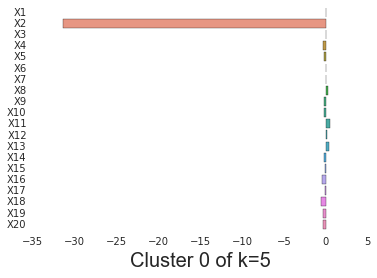

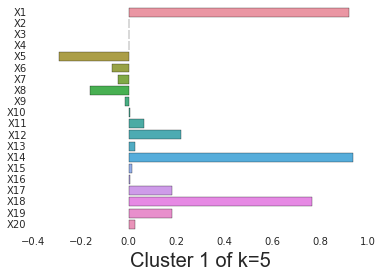

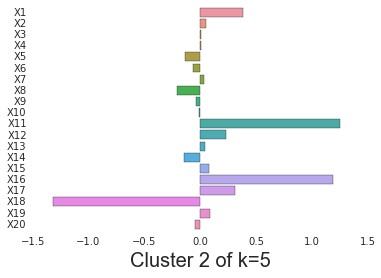

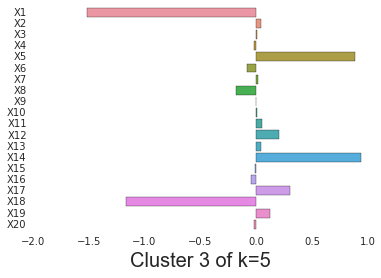

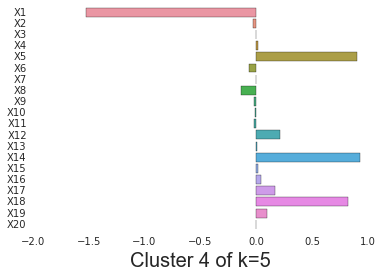

In [40]:
import seaborn as sns
#plot values each cluster label

X_sns = X.drop(labels=['ica_kmeans_k5'], axis=1)

def cluster_dashboard(clust_num, names):
    dash_list = zip(names, k_means.cluster_centers_[clust_num])
    x_val = [x[0] for x in dash_list]
    y_val = [x[1] for x in dash_list]
    dash_chart= sns.barplot(y_val, x_val, orient= 'h')
    plt.xlabel("Cluster "+ str(clust_num) +" of k=5", fontsize=20)

cluster_dashboard(0, X_sns.columns.tolist())
plt.show()
cluster_dashboard(1, X_sns.columns.tolist())
plt.show()
cluster_dashboard(2, X_sns.columns.tolist())
plt.show()
cluster_dashboard(3, X_sns.columns.tolist())
plt.show()
cluster_dashboard(4, X_sns.columns.tolist())
plt.show()


In [42]:
# GMM labels compared with Kmeans labeling
# Get values to plot and compare

np.random.seed(123)
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
sample_size = 500
news_data = news_ica

for n_clusters in cluster_range: 

    k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
    t0 = time.time()
    k_means.fit(news_data)
    t_batch = time.time() - t0
    k_means_labels = k_means.labels_
    k_means_cluster_centers = k_means.cluster_centers_
    
    g = GMM(n_components=n_clusters,covariance_type='spherical')
    g_t0 = time.time()
    g.fit(news_data)
    g_t_batch = time.time() - g_t0
    g_label_pred = g.predict(X)
    
    
    print('%.3f,  %.2fs,  %i,   %.3f,   %.3f,   %.3f,   %.3f,     %.3f'
      % (n_clusters,(time.time() - t0), 
         k_means.inertia_,
         metrics.homogeneity_score(k_means_labels, g_label_pred),
         metrics.completeness_score(k_means_labels, g_label_pred),
         metrics.v_measure_score(k_means_labels, g_label_pred),
         metrics.adjusted_rand_score(k_means_labels, g_label_pred),
         metrics.adjusted_mutual_info_score(k_means_labels,  g_label_pred)
        )
       )
      


2.000,  0.46s,  909626,   0.947,   0.947,   0.947,   0.972,     0.947
3.000,  0.92s,  808743,   0.859,   0.872,   0.865,   0.894,     0.859
4.000,  1.22s,  751414,   0.821,   0.856,   0.838,   0.791,     0.821
5.000,  1.56s,  709467,   0.676,   0.580,   0.624,   0.505,     0.580
6.000,  1.45s,  659265,   0.869,   0.889,   0.879,   0.871,     0.869
7.000,  1.53s,  626601,   0.902,   0.852,   0.876,   0.889,     0.852
8.000,  2.07s,  586970,   0.900,   0.850,   0.874,   0.886,     0.850
9.000,  2.04s,  568939,   0.818,   0.851,   0.834,   0.774,     0.818
10.000,  2.55s,  524829,   0.895,   0.824,   0.858,   0.806,     0.824
11.000,  2.51s,  503864,   0.838,   0.860,   0.849,   0.735,     0.838
12.000,  2.61s,  480689,   0.926,   0.913,   0.919,   0.923,     0.912
13.000,  2.64s,  471879,   0.943,   0.841,   0.890,   0.837,     0.841
14.000,  3.47s,  453246,   0.883,   0.832,   0.856,   0.756,     0.832
15.000,  4.44s,  432800,   0.911,   0.869,   0.890,   0.854,     0.869
16.000,  4.01s